# Milestone 5

## A. Introduction

This milestone covers basic probability using my dataset.
I will define events, compute probabilities, and show simple checks.


## B. Dataset

I used the cleaned dataset from previous milestones.

Dataset used here: `2025-08-10.csv`


In [ ]:
# B: Load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = r"2025-08-10.csv"
df = pd.read_csv(DATA_PATH)
print('Loaded:', DATA_PATH)
print('Shape:', df.shape)
print('Columns:', df.columns.tolist())

df.head(8)


Loaded: 2025-08-10.csv
Shape: (64, 18)
Columns: ['date', 'district', 'division', 'lat', 'lon', 'temp_c', 'humidity', 'pressure', 'wind_speed', 'clouds', 'rain', 'aqi', 'pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co']


,date,district,division,lat,lon,temp_c,humidity,pressure,wind_speed,clouds,rain,aqi,pm2_5,pm10,o3,no2,so2,co
0,2025-08-10,Bagerhat,Khulna,22.655478,89.794181,32.00,63,1006,3.94,100,0.0,1,1.43,3.24,40.23,0.13,0.18,98.31
1,2025-08-10,Bandarban,Chattogram,21.787476,92.412475,33.56,54,1006,1.09,96,0.0,1,0.94,1.48,31.99,0.04,0.02,79.80
2,2025-08-10,Barguna,Barishal,22.131336,90.117243,31.90,65,1006,5.18,100,0.0,1,1.10,2.93,33.37,0.03,0.09,85.17
3,2025-08-10,Barishal,Barishal,22.493403,90.354801,33.42,55,1006,5.08,100,0.0,1,0.99,2.44,34.83,0.04,0.07,85.93
4,2025-08-10,Bhola,Barishal,22.143569,90.790409,29.38,77,1007,4.41,98,0.0,1,0.51,1.29,32.46,0.02,0.03,82.80
5,2025-08-10,Bogura,Rajshahi,24.850066,89.372843,33.94,57,1004,4.17,84,0.0,3,30.62,34.07,66.92,8.73,11.25,293.51
6,2025-08-10,Brahmanbaria,Chattogram,23.960600,91.119089,33.06,66,1006,4.12,75,0.0,1,1.23,2.12,32.13,1.03,0.42,109.33
7,2025-08-10,Chandpur,Chattogram,23.224176,90.653100,32.58,61,1006,4.26,98,0.0,1,0.67,1.39,33.11,0.34,0.27,89.17


## C. Task 1: Defining Events

Selected two columns and define events. Here I use `temp_c` (numeric) and `district` (categorical).

Events (defined here):

- A = temperature > 25 (temp_c > 25)
- B = temperature between 20 and 25 (20 <= temp_c <= 25)
- C = district is the most frequent district in the dataset

I chose these because temperature is important and district shows groups.


In [ ]:
# C: define events and show counts
col_temp = 'temp_c'
col_dist = 'district'

if col_temp not in df.columns or col_dist not in df.columns:
    print('Required columns missing. Check dataset columns.')
else:
    n = len(df)
    top_dist = df[col_dist].dropna().astype(str).value_counts().idxmax()
    print('Top district:', top_dist)
    A = df[col_temp] > 25
    B = (df[col_temp] >= 20) & (df[col_temp] <= 25)
    C = df[col_dist].astype(str) == str(top_dist)
    print('\nTotal outcomes (n):', n)
    print('Count A (temp > 25):', int(A.sum()))
    print('Count B (20 <= temp <= 25):', int(B.sum()))
    print('Count C (district == top):', int(C.sum()))


Top district: Bagerhat

Total outcomes (n): 64
Count A (temp > 25): 64
Count B (20 <= temp <= 25): 0
Count C (district == top): 1


## D. Task 2: Calculating Basic Probability

For each event computed empirical probability: P(E) = favorable / total.
Verify 0 <= P <= 1 and wrote a short sentence interpretation.


In [ ]:
# D: compute probabilities and print sentences
col_temp = 'temp_c'
col_dist = 'district'
if col_temp not in df.columns or col_dist not in df.columns:
    print('Required columns missing.')
else:
    n = len(df)
    top_dist = df[col_dist].dropna().astype(str).value_counts().idxmax()
    A = df[col_temp] > 25
    B = (df[col_temp] >= 20) & (df[col_temp] <= 25)
    C = df[col_dist].astype(str) == str(top_dist)
    pA = A.sum() / n
    pB = B.sum() / n
    pC = C.sum() / n
    print('P(A) = count(A)/n =', int(A.sum()), '/', n, '=', f"{pA:.3f}")
    print('Check 0<=P(A)<=1 :', 0 <= pA <= 1)
    if pA==0:
        print('Interpretation: No rows have temp > 25.')
    else:
        print('Interpretation: Probability of temp > 25 is about', f"{pA:.1%}")
    print('\nP(B) =', int(B.sum()), '/', n, '=', f"{pB:.3f}")
    print('Check 0<=P(B)<=1 :', 0 <= pB <= 1)
    if pB==0:
        print('Interpretation: No rows in 20-25 temp.')
    else:
        print('Interpretation: Probability of temp between 20 and 25 is about', f"{pB:.1%}")
    print('\nP(C) =', int(C.sum()), '/', n, '=', f"{pC:.3f}")
    print('Check 0<=P(C)<=1 :', 0 <= pC <= 1)
    if pC==0:
        print('Interpretation: Top district not present?')
    else:
        print('Interpretation: Probability of being in top district is about', f"{pC:.1%}")


P(A) = count(A)/n = 64 / 64 = 1.000
Check 0<=P(A)<=1 : True
Interpretation: Probability of temp > 25 is about 100.0%

P(B) = 0 / 64 = 0.000
Check 0<=P(B)<=1 : True
Interpretation: No rows in 20-25 temp.

P(C) = 1 / 64 = 0.016
Check 0<=P(C)<=1 : True
Interpretation: Probability of being in top district is about 1.6%


## E. Task 3: Combined Events

Computed intersections, unions, complements. Verifying rule: P(A ∪ B) = P(A) + P(B) - P(A ∩ B)


In [ ]:
# E: combined events calculations
col_temp = 'temp_c'
col_dist = 'district'
if col_temp not in df.columns or col_dist not in df.columns:
    print('Required columns missing.')
else:
    n = len(df)
    top_dist = df[col_dist].dropna().astype(str).value_counts().idxmax()
    A = df[col_temp] > 25
    B = (df[col_temp] >= 20) & (df[col_temp] <= 25)
    C = df[col_dist].astype(str) == str(top_dist)
    AandB = (A & B)
    AandC = (A & C)
    BandC = (B & C)
    AorB = (A | B)
    AorC = (A | C)
    notA = (~A)
    notC = (~C)
    def p(x): return x.sum() / n
    print('P(A) =', f"{p(A):.3f}", '  Count:', int(A.sum()))
    print('P(B) =', f"{p(B):.3f}", '  Count:', int(B.sum()))
    print('P(C) =', f"{p(C):.3f}", '  Count:', int(C.sum()))
    print('\nP(A ∩ B) =', f"{p(AandB):.3f}", '  Count:', int(AandB.sum()))
    print('P(A ∩ C) =', f"{p(AandC):.3f}", '  Count:', int(AandC.sum()))
    print('P(B ∩ C) =', f"{p(BandC):.3f}", '  Count:', int(BandC.sum()))
    print('\nP(A ∪ B) =', f"{p(AorB):.3f}", '  Count:', int(AorB.sum()))
    print('P(A ∪ C) =', f"{p(AorC):.3f}", '  Count:', int(AorC.sum()))
    print('\nP(A^c) =', f"{p(notA):.3f}", '  Count:', int(notA.sum()))
    print('P(C^c) =', f"{p(notC):.3f}", '  Count:', int(notC.sum()))
    lhs = p(AorB)
    rhs = p(A) + p(B) - p(AandB)
    print('\nCheck union rule: P(A ∪ B) ?= P(A) + P(B) - P(A ∩ B)')
    print('LHS:', f"{lhs:.3f}")
    print('RHS:', f"{rhs:.3f}")
    print('Equal (within float tol):', abs(lhs - rhs) < 1e-9)


P(A) = 1.000   Count: 64
P(B) = 0.000   Count: 0
P(C) = 0.016   Count: 1

P(A ∩ B) = 0.000   Count: 0
P(A ∩ C) = 0.016   Count: 1
P(B ∩ C) = 0.000   Count: 0

P(A ∪ B) = 1.000   Count: 64
P(A ∪ C) = 1.000   Count: 64

P(A^c) = 0.000   Count: 0
P(C^c) = 0.984   Count: 63

Check union rule: P(A ∪ B) ?= P(A) + P(B) - P(A ∩ B)
LHS: 1.000
RHS: 1.000
Equal (within float tol): True


## F. Task 4: Visualization

Bar charts and highlighted favorable vs. total outcomes.

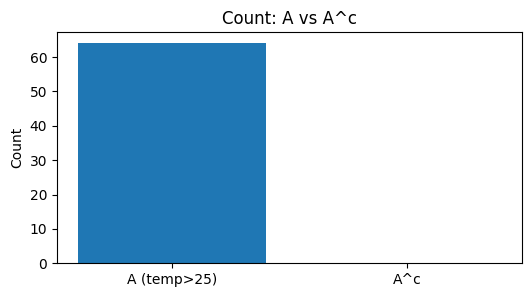

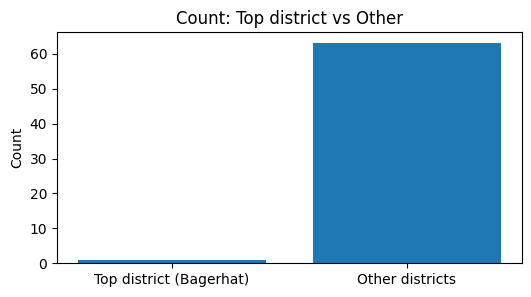

Intervals and probabilities (relative freq):
28.54 - 29.48: 0.047 (n=3)
29.48 - 30.42: 0.000 (n=0)
30.42 - 31.36: 0.109 (n=7)
31.36 - 32.31: 0.328 (n=21)
32.31 - 33.25: 0.281 (n=18)
33.25 - 34.19: 0.203 (n=13)
34.19 - 35.13: 0.031 (n=2)


In [ ]:
# F: Visualizations for events
col_temp = 'temp_c'
col_dist = 'district'
if col_temp not in df.columns or col_dist not in df.columns:
    print('Required columns missing.')
else:
    n = len(df)
    top_dist = df[col_dist].dropna().astype(str).value_counts().idxmax()
    A = df[col_temp] > 25
    B = (df[col_temp] >= 20) & (df[col_temp] <= 25)
    C = df[col_dist].astype(str) == str(top_dist)
    countsA = [int(A.sum()), int((~A).sum())]
    labelsA = ['A (temp>25)', 'A^c']
    plt.figure(figsize=(6,3))
    plt.bar(labelsA, countsA)
    plt.title('Count: A vs A^c')
    plt.ylabel('Count')
    plt.show()
    countsC = [int(C.sum()), int((~C).sum())]
    labelsC = [f'Top district ({top_dist})', 'Other districts']
    plt.figure(figsize=(6,3))
    plt.bar(labelsC, countsC)
    plt.title('Count: Top district vs Other')
    plt.ylabel('Count')
    plt.show()
    s = df[col_temp].dropna().astype(float)
    if len(s) > 0:
        edges = np.histogram_bin_edges(s, bins='sturges')
        freq, _ = np.histogram(s, bins=edges)
        rel = freq / len(s)
        print('Intervals and probabilities (relative freq):')
        for i in range(len(freq)):
            print(f"{edges[i]:.2f} - {edges[i+1]:.2f}: {rel[i]:.3f} (n={freq[i]})")


## G. Task 5: Reflection and Conclusion

Short summary is printed in next cell.

In [ ]:
# G: Auto reflection template based on computed probabilities
col_temp = 'temp_c'; col_dist='district'
if col_temp in df.columns and col_dist in df.columns:
    n = len(df)
    top_dist = df[col_dist].dropna().astype(str).value_counts().idxmax()
    A = df[col_temp] > 25
    B = (df[col_temp] >= 20) & (df[col_temp] <= 25)
    C = df[col_dist].astype(str) == str(top_dist)
    pA = A.sum() / n
    pB = B.sum() / n
    pC = C.sum() / n
    print('Short summary (edit if needed):')
    probs = [('A', pA), ('B', pB), ('C', pC)]
    probs_sorted = sorted(probs, key=lambda x: x[1], reverse=True)
    most = probs_sorted[0]
    print('- Most probable event: ' + most[0] + ' with probability ' + f"{most[1]:.3f}")
    print('- Simple notes: P(A)=' + f"{pA:.3f}" + ', P(B)=' + f"{pB:.3f}" + ', P(C)=' + f"{pC:.3f}")
    if pA>0.5 or pB>0.5 or pC>0.5:
        print('- Note: some event has probability > 50%. This may show imbalance.')
    else:
        print('- No event has probability > 50%.')
    print('- Use these probabilities to make small decisions. E.g., if P(A) high, expect many high temp rows.')
else:
    print('Required columns missing.')


Short summary (edit if needed):
- Most probable event: A with probability 1.000
- Simple notes: P(A)=1.000, P(B)=0.000, P(C)=0.016
- Note: some event has probability > 50%. This may show imbalance.
- Use these probabilities to make small decisions. E.g., if P(A) high, expect many high temp rows.


## H. Submission Guidelines

Include this notebook and outputs in your final zip.
